In [ ]:
#pip install gdown

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#url='https://drive.google.com/uc?id=1-5HoIvDe-mOW-n2Bqn0YsBf41DbraS7c'

In [ ]:
#output_file='dataset.zip'

In [ ]:
#import gdown
#gdown.download(url,output_file,quiet=False)

In [ ]:
#!cp '/content/dataset.zip' '/content/drive/MyDrive/Colab Notebooks/ann_scaling'

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/ann_scaling/dataset.zip' '/content/'   #dataset copy to colab

In [ ]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/cat_dog_dataset/cat/cat.1018.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1817.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2224.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4839.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4055.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4851.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2483.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4127.jpg  
  inflating: content/cat_dog_dataset/cat/cat.3377.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4770.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1310.jpg  
  inflating: content/cat_dog_dataset/cat/cat.508.jpg  
  inflating: content/cat_dog_dataset/cat/cat.283.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1209.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1312.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2362.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4333.jpg  

In [ ]:
#training image classification network-CNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #used to generate(split) training and validation data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
dataset_path='/content/content/cat_dog_dataset'

In [ ]:
#define hyperparameters
batch_size=32
epochs=10
image_size=(150,150)

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
training_generator=train_datagen.flow_from_directory(
   dataset_path,
   target_size=image_size,
   batch_size =batch_size,
   class_mode='binary',
   subset='training'
)

Found 8000 images belonging to 2 classes.


In [ ]:
validation_generator=train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 2000 images belonging to 2 classes.


In [ ]:
model=Sequential()
#convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))
model.add(MaxPooling2D(2,2)) #pooling layer

#fully connected layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(
     optimizer='adam',
     loss='binary_crossentropy',
     metrics=['accuracy']
)

In [ ]:
history=model.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/10
250/250 [==============================] - 29s 77ms/step - loss: 1.3020 - accuracy: 0.5964 - val_loss: 0.6035 - val_accuracy: 0.6694
Epoch 2/10
250/250 [==============================] - 19s 77ms/step - loss: 0.4968 - accuracy: 0.7645 - val_loss: 0.6202 - val_accuracy: 0.6986
Epoch 3/10
250/250 [==============================] - 19s 77ms/step - loss: 0.2994 - accuracy: 0.8795 - val_loss: 0.6550 - val_accuracy: 0.7112
Epoch 4/10
250/250 [==============================] - 18s 71ms/step - loss: 0.1399 - accuracy: 0.9575 - val_loss: 0.7299 - val_accuracy: 0.7157
Epoch 5/10
250/250 [==============================] - 19s 78ms/step - loss: 0.0623 - accuracy: 0.9871 - val_loss: 0.8820 - val_accuracy: 0.7137
Epoch 6/10
250/250 [==============================] - 19s 75ms/step - loss: 0.0250 - accuracy: 0.9967 - val_loss: 1.0477 - val_accuracy: 0.7172
Epoch 7/10
250/250 [==============================] - 18s 71ms/step - loss: 0.0077 - accuracy: 0.9999 - val_loss: 1.2179 - val_accuracy:

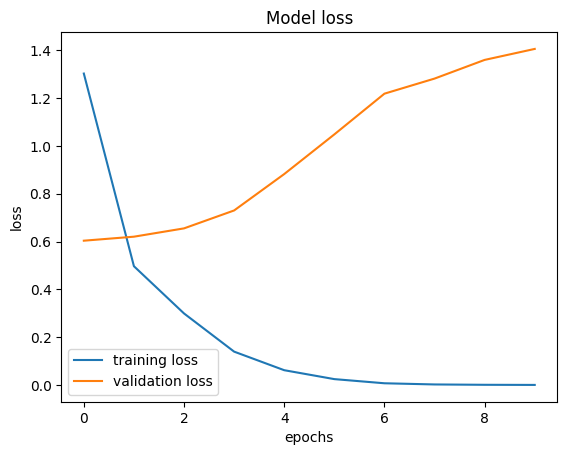

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss','validation loss'])
plt.show()

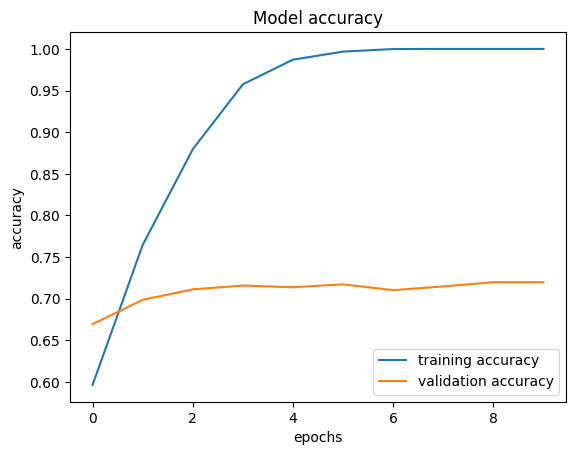

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy','validation accuracy'])
plt.show()

In [ ]:
model_2=Sequential()
#convolution layer
model_2.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))
model_2.add(MaxPooling2D(2,2)) #pooling layer

model_2.add(Conv2D(64,(3,3),activation='relu'))
model_2.add(MaxPooling2D(2,2))

model_2.add(Conv2D(128,(3,3),activation='relu'))
model_2.add(MaxPooling2D(2,2))


#fully connected layer
model_2.add(Flatten())
model_2.add(Dense(512,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

In [ ]:
model_2.compile(
     optimizer='adam',
     loss='binary_crossentropy',
     metrics=['accuracy']
)

In [ ]:
history_2=model_2.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/10
250/250 [==============================] - 20s 70ms/step - loss: 0.6497 - accuracy: 0.6235 - val_loss: 0.5714 - val_accuracy: 0.6946
Epoch 2/10
250/250 [==============================] - 20s 79ms/step - loss: 0.5316 - accuracy: 0.7320 - val_loss: 0.5226 - val_accuracy: 0.7445
Epoch 3/10
250/250 [==============================] - 20s 79ms/step - loss: 0.4752 - accuracy: 0.7682 - val_loss: 0.4991 - val_accuracy: 0.7505
Epoch 4/10
250/250 [==============================] - 18s 73ms/step - loss: 0.4063 - accuracy: 0.8111 - val_loss: 0.4738 - val_accuracy: 0.7727
Epoch 5/10
250/250 [==============================] - 18s 70ms/step - loss: 0.3180 - accuracy: 0.8576 - val_loss: 0.6285 - val_accuracy: 0.7470
Epoch 6/10
250/250 [==============================] - 19s 77ms/step - loss: 0.1974 - accuracy: 0.9189 - val_loss: 0.6661 - val_accuracy: 0.7586
Epoch 7/10
250/250 [==============================] - 20s 79ms/step - loss: 0.1081 - accuracy: 0.9609 - val_loss: 0.7686 - val_accuracy:

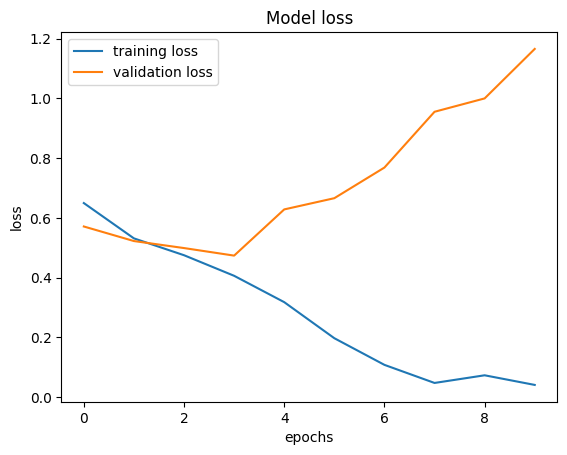

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss','validation loss'])
plt.show()

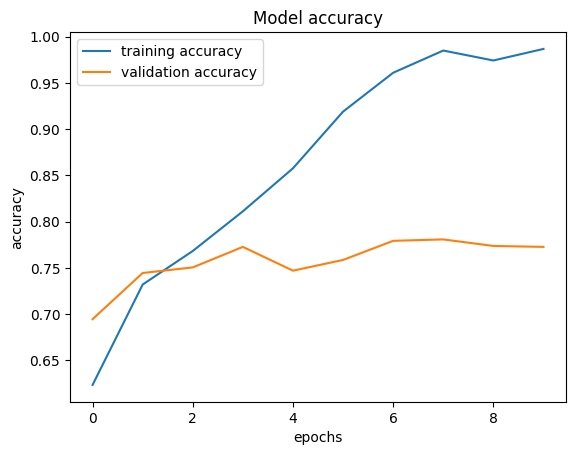

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy','validation accuracy'])
plt.show()

In [ ]:
model_2.save('cat_dog_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


prediction

In [ ]:
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.preprocessing.image import img_to_array

def predict_image(image_path):
  img=image.load_img(image_path,target_size=image_size)
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  img = img / 255
  prediction=model_2.predict(img)
  print(prediction)

  return 'Cat' if prediction<0.5 else 'Dog'


In [ ]:
img='/content/cat_in_the_city_5.jpg'

In [ ]:
prediction=predict_image(img)
print(prediction)

1/1 [==============================] - 0s 166ms/step
[[0.00013091]]
Cat


In [ ]:
img='/content/cat_in_the_city.jpg'
prediction=predict_image(img)
print(prediction)

1/1 [==============================] - 0s 26ms/step
[[3.0166863e-10]]
Cat


In [ ]:
img='/content/pexels-dominika-roseclay-895259.jpg'
prediction=predict_image(img)
print(prediction)

1/1 [==============================] - 0s 17ms/step
[[0.79356545]]
Dog
